In [65]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import torch


from sklearn.model_selection import train_test_split

from resources.data_loader import DataLoader
from resources.classifier import Classifier
from pipeline import get_default_config, plot_history
from pipeline import classify_shapelets_mts, train_mts
from pipeline import classify_shapelets_text, train_text
from pipeline import classify_baseline_text


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Loading

In [2]:
data_loader = DataLoader()

# Time Series

In [ ]:
# Preload the MTS datasets
mts_datasets = data_loader.get_mts_datasets()

In [ ]:
# Note: Can put all parameters in the config dict
#       Can then do whatever ablation studies / experiments with that
config = get_default_config()
config["stride"] = 5
for dataset in mts_datasets:
    print(dataset)
    X_train, y_train = data_loader.load_mts_dataset(dataset, split="train")
    X_test, y_test = data_loader.load_mts_dataset(dataset, split="test")
    # Filter for ragged datasets (e.g. JapaneseVowels)
    if type(X_train) == list:
        continue
    history, encoder = train_mts(X_train, config, random_state=42, debug=False)
    plot_history(history, f"plots/encoder_training_{dataset}.pdf")
    
    classify_shapelets_mts(X_train, y_train, X_test, y_test, config, encoder)

# Text

In [3]:
# Text data loading
X, y = data_loader.load_text_dataset("data")
train_indices, test_indices = train_test_split(np.arange(len(X)), stratify=y, train_size=20, test_size=100, random_state=42)
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]
print(X_train.shape)
print(X_test.shape)

(20,)
(100,)


load config:

In [57]:
config = get_default_config()
config['min_length'] = 3
config['max_length'] = 10
config['classifier'] = lambda input_size: Classifier(input_size, 100, 50, 2)

config

{'in_channels': 1,
 'channels': 20,
 'depth': 3,
 'reduced_size': 80,
 'kernel_size': 3,
 'out_channels': 160,
 'stride': 1,
 'l': [5],
 'batch_size': 16,
 'epochs': 30,
 'lr': 0.001,
 'num_clusters': 25,
 'classifier': <function __main__.<lambda>(input_size)>,
 'min_length': 3,
 'max_length': 10}

train encoder:

Epoch 1 6298.425061462862
Epoch 2 5384.150143981488
Epoch 3 2651.142139258479
Epoch 4 3681.0711328315265
Epoch 5 2481.07802506216
Epoch 6 1634.0314648458425
Epoch 7 1782.5244906835783
Epoch 8 1180.8725632474755
Epoch 9 1148.5456973715618
Epoch 10 984.5225886873862
Epoch 11 773.6391337254045
Epoch 12 810.6567359205405
Epoch 13 638.0701836896635
Epoch 14 553.984409909427
Epoch 15 613.1512339462388
Epoch 16 588.2678584240011
Epoch 17 412.5085370194679
Epoch 18 418.25547978428904
Epoch 19 371.68077113353354
Epoch 20 406.4860834020077
Epoch 21 390.5786009270819
Epoch 22 325.4397979434941
Epoch 23 322.99695628202437
Epoch 24 328.96025779052576
Epoch 25 231.37339810903183
Epoch 26 273.60933182087444
Epoch 27 241.76768466452083
Epoch 28 192.08428370460365
Epoch 29 207.9772105211382
Epoch 30 167.06706807323403


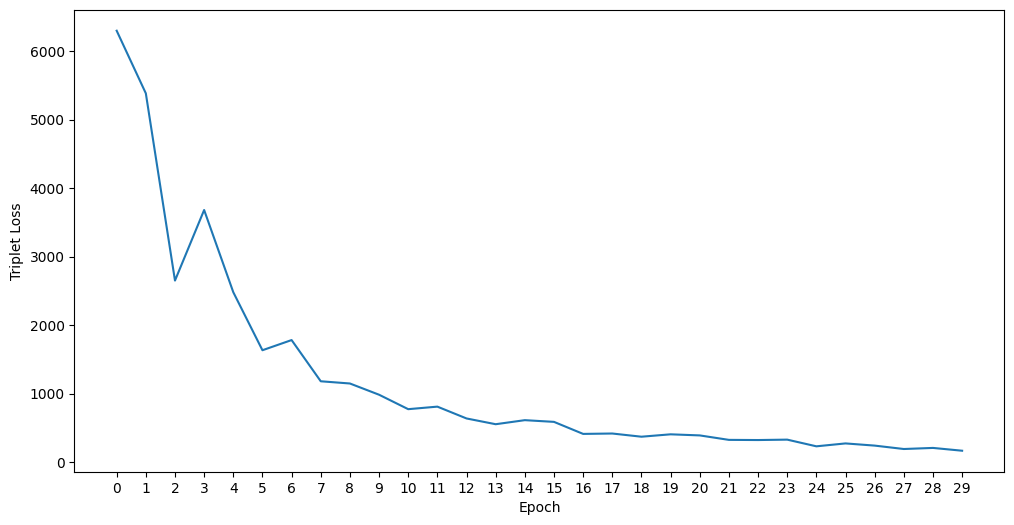

In [29]:
history, encoder, tokenizer = train_text(X_train, config, random_state=42, debug=True)

# plot and save history:
plot_history(history, f"plots/encoder_training_text.pdf")

# save encoder:
torch.save(encoder.state_dict(), "encoder.pt")

# save tokenizer:
tokenizer.save('tokenizer.json')

run shapelet classification:

In [72]:
classify_shapelets_text(X_train, y_train, X_test, y_test, config, tokenizer, encoder)

['I find it', 'antagonists. So I', 'ruthless but elegant', "just gotta'", 'give the most', 'make that WITH', 'scenes, I', 'She is the', 'has is more then most', 'this film is wonderful film for students of', 'strength is in her daily', 'heard about the', 'actress, something only', 'silliness of hunting', 'effects of racism', 'knows it is a cheesy movie and revels in', 'a bit more subdued than in her other', 'class play at a', 'It helped me to understand my', 'popularity and eventually killed them.', 'average special effects made', 'Heigl) are being tormented by her', ', the factual accuracy of the', 'woad dry. Those wonderful', 'down a wooden door or even break a glass window.']
Epoch 1 0.6933749997213827
Epoch 1 0.7053895990639397
Epoch 2 0.6921123488787997
Epoch 2 0.6908780874395266
Epoch 3 0.691206771702899
Epoch 3 0.6883354913225102
Epoch 4 0.6888463761685623
Epoch 4 0.691713402475032
Epoch 5 0.6882612835857643
Epoch 5 0.688040206947112
Epoch 6 0.6793584055314527
Epoch 6 0.71893022

array([0.7053896 , 0.69087809, 0.68833549, 0.6917134 , 0.68804021,
       0.71893022, 0.68531528, 0.67660784, 0.68892581, 0.68082599,
       0.69189362, 0.69663267, 0.68385183, 0.69764086, 0.67287778,
       0.67861023, 0.66452482, 0.64884761, 0.66064053, 0.67364529,
       0.65986429, 0.66150541, 0.6641129 , 0.64887258, 0.69462054,
       0.64090047, 0.64073663, 0.67120471, 0.66182868, 0.65831798])

## Text baselines:

Epoch 1 0.692277082530848
Epoch 1 0.6976097939864898
Epoch 2 0.6912921554401263
Epoch 2 0.6903859156853931
Epoch 3 0.6892170282750365
Epoch 3 0.6895482229562033
Epoch 4 0.6871780517239596
Epoch 4 0.6865029968197764
Epoch 5 0.6845135215673911
Epoch 5 0.6827119817754124
Epoch 6 0.6816014945137921
Epoch 6 0.6757251815358702
Epoch 7 0.6760750330560169
Epoch 7 0.6742002442140934
Epoch 8 0.6693655991121558
Epoch 8 0.6716054228701214
Epoch 9 0.6633052951621318
Epoch 9 0.6596545440774951
Epoch 10 0.6519866126320646
Epoch 10 0.6622890069756746
Epoch 11 0.6480047385886671
Epoch 11 0.6269559090643593
Epoch 12 0.6332128814148017
Epoch 12 0.6284630399150355
Epoch 13 0.6174389152131331
Epoch 13 0.6271703205927449
Epoch 14 0.609296608395297
Epoch 14 0.5861166359924792
Epoch 15 0.5922322676137628
Epoch 15 0.5743247825982074
Epoch 16 0.5733492643031268
Epoch 16 0.5633970458107959
Epoch 17 0.5553247862243603
Epoch 17 0.5389401951212337
Epoch 18 0.5354792009546745
Epoch 18 0.5150792271672828
Epoch 19 0.5

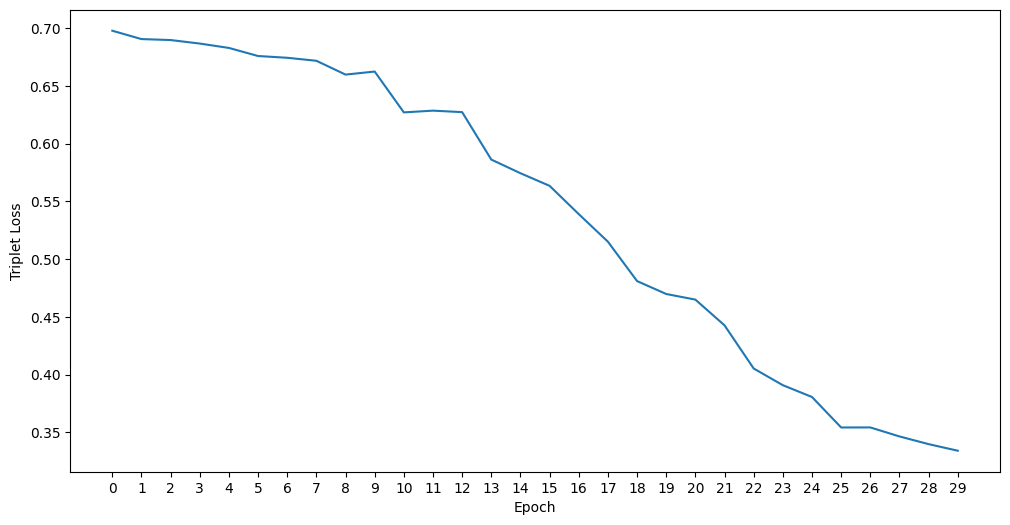

In [69]:
history = classify_baseline_text(X_train, y_train, X_test, y_test, config, random_state=42)

plot_history(history, f"plots/basline_training_text.pdf")